<a href="https://colab.research.google.com/github/RaghadAlnouri/Raghad/blob/master/R_Alnouri_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
Build the AlexNet architecture and train it on the CIFAR100 dataset.

You may resize some of the kernel sizes (mainly the first one) and the number of kernels because CIFAR100 is a smaller dataset than ImageNet, as well as lower-resolution (32x32 vs 224x224).

You may resize the number of kernels used per layer if it speeds up training and/or preserves accuracy.

Report training, validation and test errors. Which hyperparameters did you change to improve performance?

**MAKE SURE YOU USE A GPU!** Top menu select "Runtime", then "Runtime Type". Make sure "Hardware Accelerator" has the option "GPU" selected.

Tips:
- Start with only a few of a layers and check if the network can learn.
- Add layers progressively.
- Be patient: more layers and dropout can make the learning slower.
- Check the shape of the output of the model to make sure your layers and convolutions are the right size.
- The accuracy for random predictions is ~0.01.
- Favor a model that works vs reproducing the exact architecture, in case the exact architecture is too difficult to train.
- If you don't reproduce the exact architecture, that is fine. Explain what you changed and why!
- If you implement a different architecture in favor of AlexNet, report performance by AlexNet nonetheless.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar100.load_data()

In [0]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

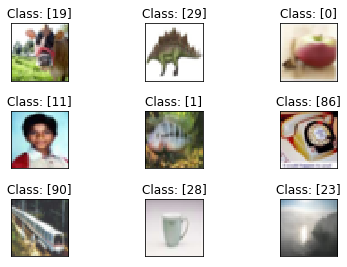

In [0]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train_full[i], interpolation='none')
  plt.title('Class: {}'.format(y_train_full[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
class LocalResponseNormalization(keras.layers.Layer):
  """ Here is an implementation of the special layer used in the 2012 paper. """

  def __init__(self, depth_radius=5, bias=1, alpha=1, beta=0.5, **kwargs):
    super().__init__(**kwargs)
    self.depth_radius=depth_radius
    self.bias=bias
    self.alpha=alpha
    self.beta=beta

  def call(self, input):
    output = tf.nn.local_response_normalization(
        input,
        depth_radius=self.depth_radius,
        bias=self.bias,
        alpha=self.alpha,
        beta=self.beta,
        name=None)
    return output

In [0]:
from tensorflow.keras.layers import Flatten, Dense, Softmax, Conv2D,\
MaxPooling2D, BatchNormalization, concatenate, Activation, Dropout

# I have tried to keep the same architecture as alexnet, but I had to change 
# the kernel sizes and strides because the image size in cifar100 is much smaller

# I also reduced the filter sizes in general, because we should need smaller capacity
# for cifar100 than imagenet, so by reducing the number of filters I reduce the number
# of parameters in the model. This will avoid overfitting.
inputs = keras.Input(shape=(70,70,32))
#tower = Flatten()(inputs)
#tower = Dense(50)(tower)
tower = Conv2D(filters=64, input_shape=(70,70,32), kernel_size=(7,7),\
               strides=(2,2), padding='valid')(inputs)
# tower = Activation('relu')(tower)
# tower = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(tower)


# tower = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same')(tower)
# tower = Activation('relu')(tower)
# tower = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(tower)


# tower = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(tower)
# tower = Activation('relu')(tower)
# # tower = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(tower)

# tower = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same')(tower)
# tower = Activation('relu')(tower)

# tower = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same')(tower)
# tower = Activation('relu')(tower)

# tower = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(tower)

# # I also reduced the number of hidden units in the dense layers. This is also to reduce
# # capacity for cifar100, and it makes training faster.
# tower = Flatten()(tower)
# tower = Dropout(0.5)(tower)
# tower = Dense(1024, activation='relu')(tower)
# tower = Dropout(0.5)(tower)
# tower = Dense(1024, activation='relu')(tower)

# I tried to remove Dropout as a hyper-parameter, but this resulted in lower validation accuracy (overfitting)

outputs = tower # Dense(100, activation='softmax')(tower)

func_model = keras.Model(inputs, outputs)

#func_model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
#                   optimizer=keras.optimizers.Adam(1e-3), 
#                   metrics=[keras.metrics.sparse_categorical_accuracy, keras.metrics.sparse_categorical_accuracy])
func_model.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 70, 70, 32)]      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        100416    
Total params: 100,416
Trainable params: 100,416
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.layers import Flatten, Dense, Softmax, Conv2D


inputs = keras.Input(shape=(70,70,32))

outputs = Conv2D(filters=64, input_shape=(70,70,32), kernel_size=(7,7),\
               strides=(2,2), padding='valid')(inputs)

func_model = keras.Model(inputs, outputs)
func_model.summary()



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 70, 70, 32)]      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        100416    
Total params: 100,416
Trainable params: 100,416
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = func_model.fit(X_train_full, y_train_full, batch_size=100, epochs=50, validation_data=[X_test, y_test])

In [0]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

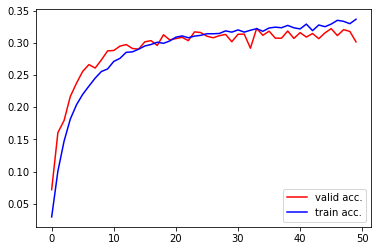

In [0]:
plt.plot(history.history['val_sparse_categorical_accuracy'], 'r')
plt.plot(history.history['sparse_categorical_accuracy'], 'b')
plt.legend(['valid acc.', 'train acc.'])

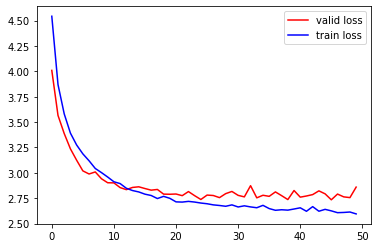

In [0]:
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['loss'], 'b')
plt.legend(['valid loss', 'train loss'])